
   #                         Data Driven Recommendations: Aviation Business

# Overview
The objective of this analysis is to Come up with Actionable Insights that informs a company that wants to venture into aviation business  on the Areas of focus(operating airplanes for commercial and private enterprises). We want to get the less risky Aircraft in the aviation Business. The data set used is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

# Business Understanding
We will be using the National Transportation Safety Board data to identify the aircraft that is associated with the lowest accident rates and has the highest safety record by assessing factors like make, category, Engine types by the number of accidents.
we will come up with actionable insights for the company to select the safest aircraft and give effective risk management

# Technologies used
1. pandas - for manipulation and analysis
2. numpy - for numerical operations and calculations
3. matplotlib -  for interactive visuals
4. seaborn - Data visualizations

# The analysis will cover the following features
1. loading the aviation data set and getting the required information
2. Data cleaning
3. Exploratory data analysis(visualizations)

In [1]:
#importing the required liblaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Loading dataset and getting the required information

In [2]:
#reading the csv file
#the data is encoded in latin encoding style hence the specification (encoding = 'latin1')
#low_memory = False helps pandas read file and to infer the correct data type
df = pd.read_csv("AviationData.csv", encoding = 'latin1', low_memory = False)

In [3]:
#df.head() gives the first five rows of the data
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
# the .tail()retrieves the last five rows from the data
#it's used to ensure that the data is uniform from top to bottom
df.tail()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [5]:
#checking the number of columns and rows in the aviation data
shape = df.shape
print(shape)
print(f'the data set contains {shape[0]} rows and {shape[1]} columns')


(88889, 31)
the data set contains 88889 rows and 31 columns


In [6]:
# checking the colums in the data
df.columns


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [7]:
#checking the data set information
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Columns: 31 entries, Event.Id to Publication.Date
dtypes: float64(5), object(26)
memory usage: 21.0+ MB


In [8]:
#checking the data types
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [9]:
# changing Event.Date and Publication.Date  from objects to date_time
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'])

In [10]:
#running the dtypes again to confirm the type has changed
df.dtypes

Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Latitude                          object
Longitude                         object
Airport.Code                      object
Airport.Name                      object
Injury.Severity                   object
Aircraft.damage                   object
Aircraft.Category                 object
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
FAR.Description                   object
Schedule                          object
Purpose.of.flight                 object
Air.carrier                       object
Total.Fatal.Injuries             float64
Total.Serious.In

In [11]:
#descriptive statistics for numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [12]:
#descriptive statistics for object data type
df.describe( include = 'O').T

,count,unique,top,freq
Event.Id,88889,87951,20001214X45071,3
Investigation.Type,88889,2,Accident,85015
Accident.Number,88889,88863,DCA22LA135,2
Location,88837,27758,"ANCHORAGE, AK",434
Country,88663,219,United States,82248
Latitude,34382,25589,332739N,19
Longitude,34373,27154,0112457W,24
Airport.Code,50249,10375,NONE,1488
Airport.Name,52790,24871,Private,240
Injury.Severity,87889,109,Non-Fatal,67357


In [13]:
#creating a copy of data to be used in data cleaning
df0 = df.copy (deep = True)

In [14]:
df0.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-12-09
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1980-04-16


In [15]:
#getting unique values in a column called name
df0['Make'].nunique()

8237

#### Problem statement
For a company that wants to venture into aviation business, it is crucial for the company to investigate several factors before purchasing planes; The industry is always faced with various challenges some of which affects the reputation of a company. Such challenges include, planes having accidents and injuring or causing fatalities. Therefore, this analysis aims to investigate several factors that should be considerd before purchasing aircrafts, these factors in this case are;
1. The model and make that is involved in least number of accidents/injuries
2. The Engine type that is least involved
3. whether Amature built aircrafts are safe
4. The aircraft category that is least involved in accidents/injuries


#### Metrics of Success
My project will be successful if I am able to investigate the factors listed above and come up with reccomendations on what the company should consider doing in order to be successful in the Aviation Business

## 2 Data cleaning

#### 2.1 Checking columns to see if there are mispelt columns

In [16]:
#checking the columns
df0.columns


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [17]:
#Removing the white spaces
df0.columns = df0.columns.str.replace(' ', '')
df0.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [18]:
df0.groupby('Weather.Condition')['Weather.Condition'].count()

Weather.Condition
IMC     5976
UNK      856
Unk      262
VMC    77303
Name: Weather.Condition, dtype: int64

In [19]:
#weather condation has unknown named in various forms; UNK, unk and Unknown, this code makes them have the same name 'unknown'
df0['Weather.Condition'] = df0['Weather.Condition'].str.replace('UNK','unknown')
df0['Weather.Condition'] = df0['Weather.Condition'].str.replace('Unk','unknown')
df0['Weather.Condition'].unique()

array(['unknown', 'IMC', 'VMC', nan], dtype=object)

In [20]:
df0.groupby('Make')['Make'].nunique()

Make
107.5 Flying Corporation    1
1200                        1
177MF LLC                   1
1977 Colfer-chan            1
1st Ftr Gp                  1
                           ..
Zukowski                    1
Zwart                       1
de Havilland                1
drone                       1
unknown                     1
Name: Make, Length: 8237, dtype: int64

In [21]:
# combining aircrafts with the same name but writen diffferently
df0['Make'] = df0['Make'].str.replace('Cessna','CESSNA')
df0['Make'] = df0['Make'].str.replace('Boeing','BOEING')
df0['Make'] = df0['Make'].str.replace('Piper','PIPER')
df0['Make'] = df0['Make'].str.replace('Bell','BELL')
df0['Make'] = df0['Make'].str.replace('Beech','BEECH')
df0['Make'] = df0['Make'].str.replace('Airbus','AIRBUS')
df0['Make'] = df0['Make'].str.replace('Mooney','MOONEY')

df0['Make'].unique()

array(['Stinson', 'PIPER', 'CESSNA', ..., 'JAMES R DERNOVSEK',
       'ORLICAN S R O', 'ROYSE RALPH L'], dtype=object)

#### 2.2 droping the unnecessary columns

In [22]:
# the purpose of this project is to inform the company on what aircraft is safe to buy and therefore that does not require some of the columns.
# dropping unnecessary columns
df0.drop(columns = 'Airport.Name', axis=1, inplace=True)
df0.drop(columns = 'Airport.Code', axis=1, inplace=True)
df0.drop(columns = 'FAR.Description', axis=1, inplace=True)
df0.drop(columns = 'Schedule', axis=1, inplace=True)
df0.drop(columns = 'Report.Status', axis=1, inplace=True)
df0.drop(columns = 'Event.Date', axis=1, inplace=True)
df0.drop(columns = 'Publication.Date', axis=1, inplace=True)
df0.drop(columns = 'Registration.Number', axis=1, inplace=True)
df0.drop(columns = 'Accident.Number', axis=1, inplace=True)
df0.drop(columns = 'Event.Id', axis=1, inplace=True)
df0.drop(columns = 'Investigation.Type', axis=1, inplace=True)




In [23]:
#checking if the columns has been droped
df0.columns

Index(['Location', 'Country', 'Latitude', 'Longitude', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight'],
      dtype='object')

#### 2.3checking for missing values in the data and working on them

In [24]:
#check the missing values
df0.isnull().sum()

Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
dtype: int64

#### 2.4 dealing with missing data

##### 2.41 dealing with missing numerical data using mean and mode
Here, various method of dealing with missing numerical data are employed. 
First is using the mode method which replaces the missing values with the mode of the data in a particular column 
The mean also works the same as the mode, replaces the missing values with the mean values of a particular colum.

In [25]:
#getting the mode for number of engines
df0['Number.of.Engines'].mode()[0]
# filling using the mode
df0['Number.of.Engines'].fillna(df0['Number.of.Engines'].mode()[0], inplace=True)

In [26]:
#using the mean
df0['Total.Fatal.Injuries'].mean()
#filling in the missing values using the mean
df0['Total.Fatal.Injuries'].fillna(df0['Total.Fatal.Injuries'].mean(), inplace=True)

In [27]:
#using the mean for serious injuries
df0['Total.Serious.Injuries'].mean()
#filling in the missing values using the mean
df0['Total.Serious.Injuries'].fillna(df0['Total.Serious.Injuries'].mean(), inplace=True)

In [28]:
#using the mean for total minor injuries
df0['Total.Minor.Injuries'].mean()
#filling in the missing values using the means
df0['Total.Minor.Injuries'].fillna(df0['Total.Minor.Injuries'].mean(), inplace=True)

In [29]:
#using the mean for total uninjured
df0['Total.Uninjured'].mean()
#filling in the missing values using the means
df0['Total.Uninjured'].fillna(df0['Total.Uninjured'].mean(), inplace=True)

In [30]:
#check if the missing values are removed for categorical data
df0.isnull().sum()


Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines             0
Engine.Type                7077
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          4492
Broad.phase.of.flight     27165
dtype: int64

##### 2.42 dealing with missing non-numeric data
In this case, several methods of dealing with missing non-numeric data are used. 
The .mode method is used to replace missing values with the most occuring value
The .fillna method is used to fill the Nan values with 'Unknown'.
The .dropna method is also used to drop the null values for columns that has few number of missing values

In [31]:
# injury severity can be dealt with using the mode, since there are few outcomes 
df_cleaned = df0['Injury.Severity'].mode()[0]
df_cleaned= df0['Injury.Severity'].fillna(df0['Injury.Severity'].mode()[0], inplace=True)

In [32]:
df_cleaned = df0['Aircraft.Category'].mode()[0]
df_cleaned= df0['Aircraft.Category'].fillna(df0['Aircraft.Category'].mode()[0], inplace=True)

In [33]:
df_cleaned = df0['Air.carrier'].mode()[0]
df_cleaned= df0['Air.carrier'].fillna(df0['Air.carrier'].mode()[0], inplace=True)

In [34]:
df_cleaned = df0['Broad.phase.of.flight'].mode()[0]
df_cleaned= df0['Broad.phase.of.flight'].fillna(df0['Broad.phase.of.flight'].mode()[0], inplace=True)

In [35]:
df_cleaned = df0['Engine.Type'].mode()[0]
df_cleaned= df0['Engine.Type'].fillna(df0['Engine.Type'].mode()[0], inplace=True)

In [36]:
df_cleaned = df0['Weather.Condition'].mode()[0]
df_cleaned= df0['Weather.Condition'].fillna(df0['Weather.Condition'].mode()[0], inplace=True)

In [37]:
# replacing missing values with unknown 
df_cleaned = df0['Latitude'].fillna('unknown', inplace=True)
df_cleaned = df0['Longitude'].fillna('unknown', inplace=True)
df_cleaned = df0['Country'].fillna('unknown', inplace=True)
df_cleaned = df0['Aircraft.damage'].fillna('unknown', inplace=True)
df_cleaned = df0['Purpose.of.flight'].fillna('unknown', inplace=True)



In [38]:

# since make,Model,Location and Amateur.Build has few missing values the dropna method is approprate
df_cleaned = df0.dropna(subset=['Make', 'Model', 'Location', 'Amateur.Built'])

In [39]:
#all the columns have no missing values
df_cleaned.isnull().sum()

Location                  0
Country                   0
Latitude                  0
Longitude                 0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64

In [40]:
#checking for duplicates
df0.duplicated().sum()

289

In [41]:
#droping duplicates
df0.drop_duplicates(inplace=True)

#check
df0.duplicated().sum()

0

In [42]:
#checking the shape to see whether the rows and some columns have been droped9807o
df_cleaned.shape

(88630, 20)

#### 2.43 Checking for outliers and dealing with them
In this case, outliers for the numerical data will be dealt with using the Interquartile Range method to ensure smooth analysis of the data

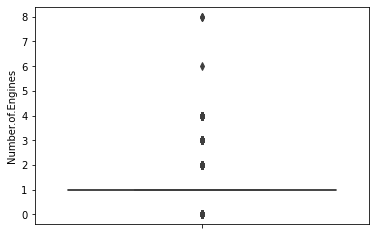

In [43]:
#checking for outliers in the Number of Engines data type using a box plot

sns.boxplot(data=df_cleaned, y="Number.of.Engines");


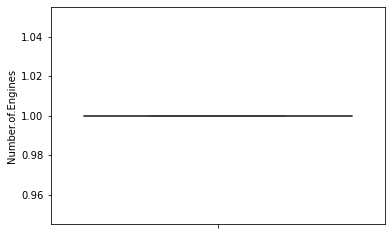

In [44]:
# removing number of Engines outliers
# interquartile range (IQR)
q1 = df_cleaned['Number.of.Engines'].quantile(0.25)
q3 = df_cleaned['Number.of.Engines'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# remove outliers
df1 = df_cleaned[(df_cleaned['Number.of.Engines'] >= lower_bound) & (df_cleaned['Number.of.Engines'] <= upper_bound)]

# Checking the boxplot again
sns.boxplot(y='Number.of.Engines', data=df1);


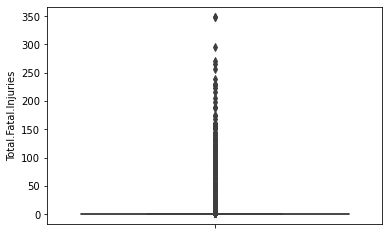

In [45]:
#checking for outliers in the Total.Fatal.Injuries data using a box plot

sns.boxplot(data=df_cleaned, y="Total.Fatal.Injuries");


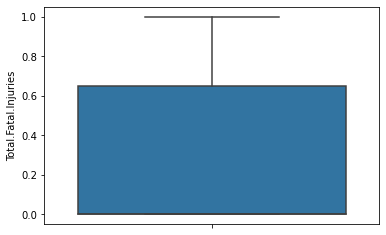

In [46]:
# revoving Total.Fatal.Injuries outliers
# interquartile range (IQR)
q1 = df_cleaned['Total.Fatal.Injuries'].quantile(0.25)
q3 = df_cleaned['Total.Fatal.Injuries'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# to remove outliers
df1 = df_cleaned[(df_cleaned['Total.Fatal.Injuries'] >= lower_bound) & (df_cleaned['Total.Fatal.Injuries'] <= upper_bound)]

# Checking the boxplot again
sns.boxplot(y='Total.Fatal.Injuries', data=df1);


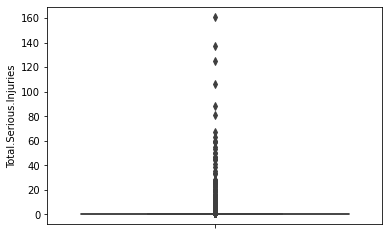

In [47]:
#checking for outliers in the Total.Serious.Injuries data using a box plot

sns.boxplot(data=df_cleaned, y="Total.Serious.Injuries");



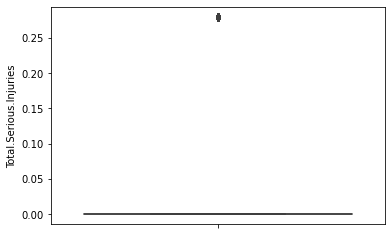

In [48]:
# revoving Total.Serious.Injuries outliers
#interquartile range (IQR)
q1 = df_cleaned['Total.Serious.Injuries'].quantile(0.25)
q3 = df_cleaned['Total.Serious.Injuries'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# remove outliers
df1 = df_cleaned[(df_cleaned['Total.Serious.Injuries'] >= lower_bound) & (df_cleaned['Total.Serious.Injuries'] <= upper_bound)]

# Checking the boxplot again
sns.boxplot(y='Total.Serious.Injuries', data=df1);


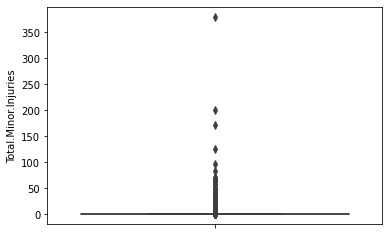

In [49]:

#checking for outliers in the Total.Minor.Injuries data using a box plot

sns.boxplot(data=df_cleaned, y="Total.Minor.Injuries");

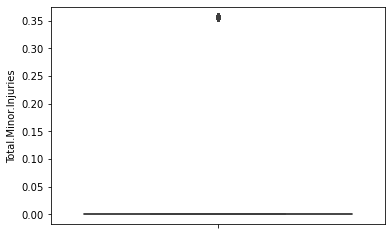

In [50]:
# revoving Total.Minor.Injuries outliers
#interquartile range (IQR)
q1 = df_cleaned['Total.Minor.Injuries'].quantile(0.25)
q3 = df_cleaned['Total.Minor.Injuries'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

#remove outliers
df1 = df_cleaned[(df_cleaned['Total.Minor.Injuries'] >= lower_bound) & (df_cleaned['Total.Minor.Injuries'] <= upper_bound)]

# Checking the boxplot again
sns.boxplot(y='Total.Minor.Injuries', data=df1);

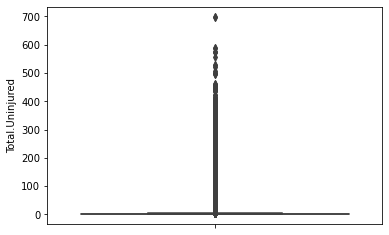

In [51]:
#checking for outliers in the Total.Uninjured data using a box plot

sns.boxplot(data=df_cleaned, y="Total.Uninjured");

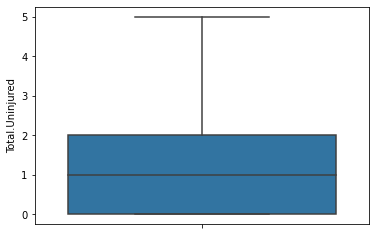

In [52]:
# revoving Total.Uninjured outliers
# interquartile range (IQR)
q1 = df_cleaned['Total.Uninjured'].quantile(0.25)
q3 = df_cleaned['Total.Uninjured'].quantile(0.75)
iqr = q3 - q1


lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# remove outliers
df1 = df_cleaned[(df_cleaned['Total.Uninjured'] >= lower_bound) & (df_cleaned['Total.Uninjured'] <= upper_bound)]

# Checking the boxplot again
sns.boxplot(y='Total.Uninjured', data=df1);

#### 2.43 saving the new dataframe

In [53]:
#save the new dataframe in cvs format
df1.to_csv('clean_aviationdata.csv', index=False)

## 3 Exploratory Data Analysis

In [54]:
#loading the clean Dataset and creating a adataframe
data = pd.read_csv('clean_aviationdata.csv')
data.head()

,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,"MOOSE CREEK, ID",United States,unknown,unknown,Fatal(2),Destroyed,Airplane,Stinson,108-3,No,1.0,Reciprocating,Personal,Pilot,2.0,0.0,0.000000,0.0,unknown,Cruise
1,"BRIDGEPORT, CA",United States,unknown,unknown,Fatal(4),Destroyed,Airplane,PIPER,PA24-180,No,1.0,Reciprocating,Personal,Pilot,4.0,0.0,0.000000,0.0,unknown,Unknown
2,"EUREKA, CA",United States,unknown,unknown,Fatal(2),Destroyed,Airplane,Rockwell,112,No,1.0,Reciprocating,Personal,Pilot,2.0,0.0,0.000000,0.0,IMC,Cruise
3,"Canton, OH",United States,unknown,unknown,Fatal(1),Destroyed,Airplane,CESSNA,501,No,1.0,Reciprocating,Personal,Pilot,1.0,2.0,0.357061,0.0,VMC,Approach
4,"COTTON, MN",United States,unknown,unknown,Fatal(4),Destroyed,Airplane,CESSNA,180,No,1.0,Reciprocating,Personal,Pilot,4.0,0.0,0.000000,0.0,IMC,Unknown


In [55]:
#adding a column (Total Injuries)
data['Total.Injuries'] = data['Total.Fatal.Injuries']+data['Total.Serious.Injuries'] + data['Total.Minor.Injuries']
data.tail()

,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,...,Engine.Type,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Total.Injuries
78685,"Annapolis, MD",United States,unknown,unknown,Minor,unknown,Airplane,PIPER,PA-28-151,No,...,Reciprocating,Personal,Pilot,0.0,1.0,0.0,0.0,VMC,Landing,1.0
78686,"Hampton, NH",United States,unknown,unknown,Non-Fatal,unknown,Airplane,BELLANCA,7ECA,No,...,Reciprocating,unknown,Pilot,0.0,0.0,0.0,0.0,VMC,Landing,0.0
78687,"Payson, AZ",United States,341525N,1112021W,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,...,Reciprocating,Personal,Pilot,0.0,0.0,0.0,1.0,VMC,Landing,0.0
78688,"Morgan, UT",United States,unknown,unknown,Non-Fatal,unknown,Airplane,CESSNA,210N,No,...,Reciprocating,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,VMC,Landing,0.0
78689,"Athens, GA",United States,unknown,unknown,Minor,unknown,Airplane,PIPER,PA-24-260,No,...,Reciprocating,Personal,Pilot,0.0,1.0,0.0,1.0,VMC,Landing,1.0


### 3.1 Univariate analysis
 This is used to describe and summarize the distribution of a single variable


In [56]:
data.describe (include = 'O').T


,count,unique,top,freq
Location,78690,25336,"ANCHORAGE, AK",401
Country,78690,194,United States,73977
Latitude,78690,21295,unknown,50429
Longitude,78690,22527,unknown,50437
Injury.Severity,78690,66,Non-Fatal,62777
Aircraft.damage,78690,5,Substantial,59382
Aircraft.Category,78690,15,Airplane,74316
Make,78690,7432,CESSNA,25342
Model,78690,10787,152,2298
Amateur.Built,78690,2,No,71223


From the above descriptive statistics and in line with our analysis, we can be able to tell;

1. The airplane is the aircraft category involved in most accidents.

2. The Cessna make is the make that is involved in most accidents

3. Model 152 is also the most plane involved in accidents

4. The Reciprocating engine type is the most engine type involved in accidents

5. Private flights are the most involved in accidents

6. VMC weather condition is the worst to fly in and

7. Most accidents occurs during landing phase of the flight

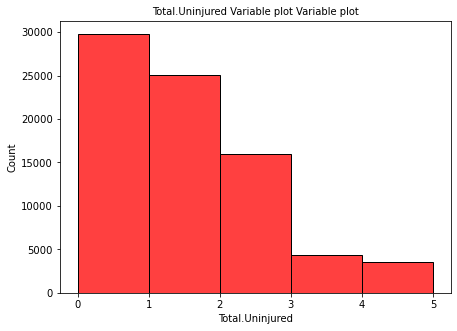

In [57]:
# histogram to show the  frequency of the Total uninjured
plt.figure(figsize=(7,5))
sns.histplot(x=data['Total.Uninjured'], bins=5, color = 'red')
plt.title('Total.Uninjured Variable plot Variable plot', fontsize=10)
plt.show()

Cessna is the most involved make in accidents

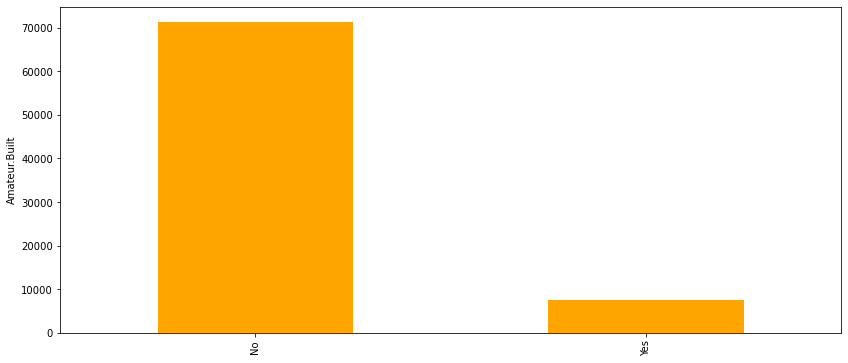

In [58]:
#bar graph count of amateur built aircrafts 
ax = data['Amateur.Built'].value_counts().plot(kind='bar', figsize=(14,6), color = 'orange')
ax.set_ylabel('Amateur.Built');

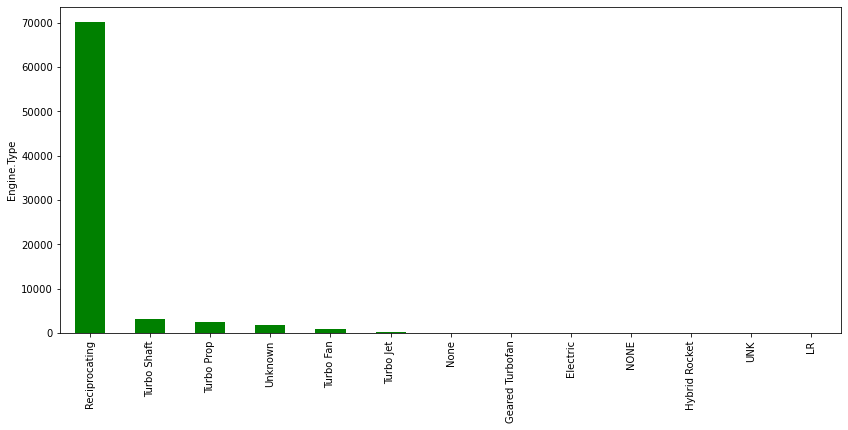

In [59]:
# count of Engine.types
ax = data['Engine.Type'].value_counts().plot(kind='bar', figsize=(14,6), color = 'green')
ax.set_ylabel('Engine.Type');

In [60]:
#skewness and kurtosis

columns = [['Location', 'Country', 'Latitude', 'Longitude', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight']]

for column in columns:
  print("skew is:\n " + str(data[column].skew()))
  print("\n\n")
  print("kurtosis is:\n " + str(data[column].kurtosis()))



skew is:
 Number.of.Engines          2.802123
Total.Fatal.Injuries      41.530744
Total.Serious.Injuries    72.536424
Total.Minor.Injuries      14.624500
Total.Uninjured            1.097882
dtype: float64



kurtosis is:
 Number.of.Engines           16.407268
Total.Fatal.Injuries      2111.551241
Total.Serious.Injuries    9352.831282
Total.Minor.Injuries       777.633704
Total.Uninjured              0.988117
dtype: float64


### 3.2 Bivariate analysis

In [61]:
corr = data.corr()
corr

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injuries
Number.of.Engines,1.000000,0.076348,0.010162,0.002678,0.091528,0.073637
Total.Fatal.Injuries,0.076348,1.000000,0.069753,0.038834,-0.096402,0.950108
Total.Serious.Injuries,0.010162,0.069753,1.000000,0.143869,-0.132733,0.326836
Total.Minor.Injuries,0.002678,0.038834,0.143869,1.000000,-0.181244,0.242508
Total.Uninjured,0.091528,-0.096402,-0.132733,-0.181244,1.000000,-0.152099
Total.Injuries,0.073637,0.950108,0.326836,0.242508,-0.152099,1.000000


1.A correlation value close to +1 indicates a strong positive correlation between the variables

2.A correlation value close to 0(zero) indicates a weak positive correlation

3.A negative value indicates a negative correlation

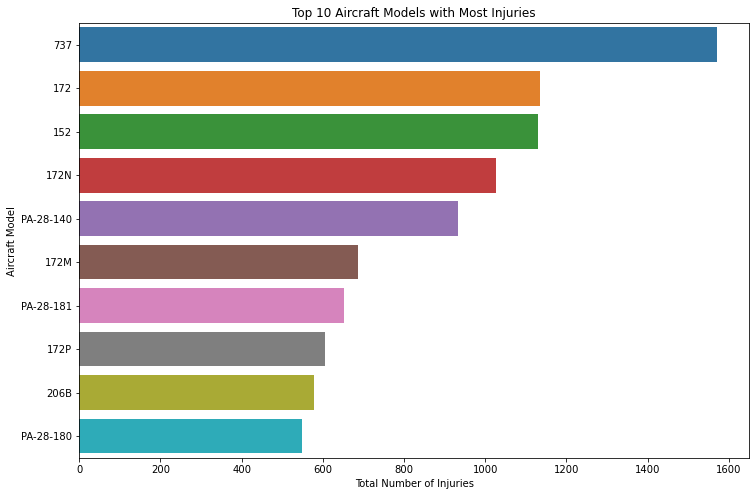

In [62]:
# since model has many unique values, we use the top 10 most occuring model 
grouped_data = data.groupby('Model')['Total.Injuries'].sum().reset_index()
top_10_data = grouped_data.sort_values(by='Total.Injuries', ascending=False).head(10)
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Total.Injuries', y='Model', data=top_10_data)
bar_plot.set_xlabel('Total Number of Injuries')
bar_plot.set_ylabel('Aircraft Model')
bar_plot.set_title('Top 10 Aircraft Models with Most Injuries')

plt.show()

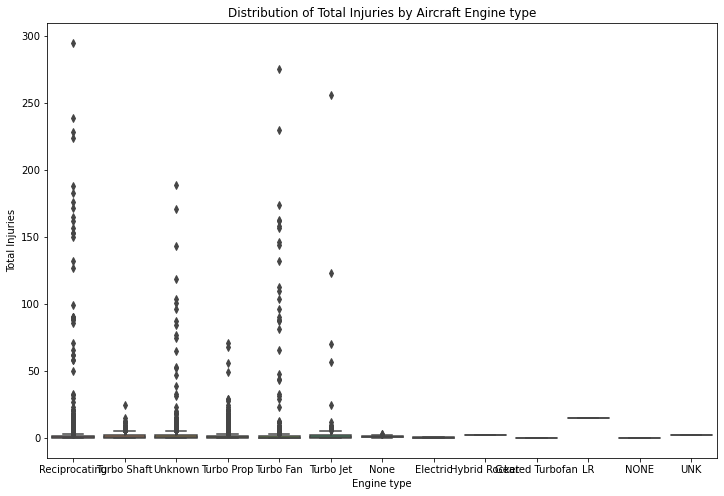

In [63]:
# boxplot of Engine type by total injuries caused
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Engine.Type', y='Total.Injuries')  
plt.title('Distribution of Total Injuries by Aircraft Engine type')
plt.xlabel('Engine type')
plt.ylabel('Total Injuries')
plt.show()


Receprocating Engine type appears to be the Engine type that causes the most accidents with injuries

while the LR Engine type appears to have caused no accidents

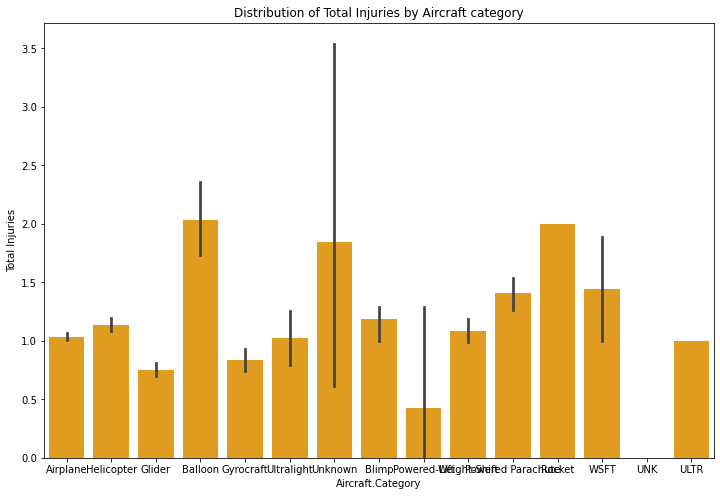

In [64]:
#barplot of distribution of total injuries by aircraft category
plt.figure(figsize=(12, 8))
sns.barplot(data=data, x='Aircraft.Category', y='Total.Injuries', color = 'orange')  
plt.title('Distribution of Total Injuries by Aircraft category')
plt.xlabel('Aircraft.Category')
plt.ylabel('Total Injuries')
plt.show()


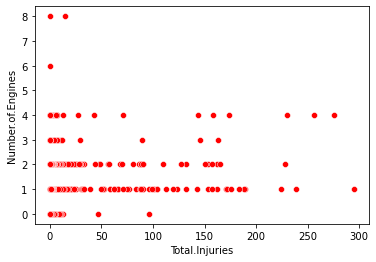

In [65]:
# number of engines by Total injuries
sns.scatterplot(y=data['Number.of.Engines'], x=data['Total.Injuries'], color = 'red');

### 3.3 Multivariate Analysis

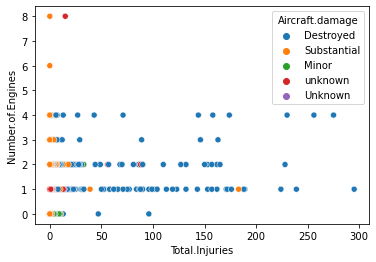

In [66]:
# Showing how aircraft damage is associated with injuries
sns.scatterplot(x=data['Total.Injuries'], y=data['Number.of.Engines'], hue=data['Aircraft.damage']);

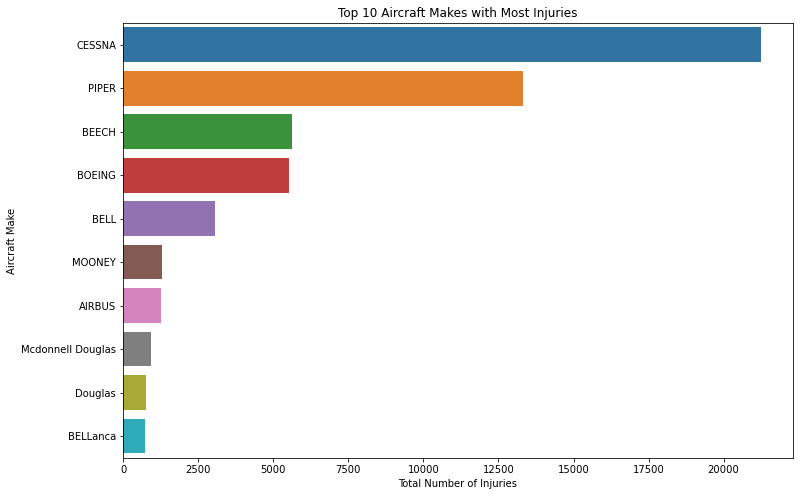

In [67]:
# Top 10 Aircraft makes/models with the most number of injuries
make_data = data.groupby('Make')['Total.Injuries'].sum().reset_index()
model_data = data.groupby('Model')['Total.Injuries'].sum().reset_index()
top_10_data = make_data.sort_values(by='Total.Injuries', ascending=False).head(10)
plt.figure(figsize=(12, 8))
bar_plot =sns.barplot(x='Total.Injuries', y='Make', data=top_10_data)
bar_plot.set_xlabel('Total Number of Injuries')
bar_plot.set_ylabel('Aircraft Make')
bar_plot.set_title('Top 10 Aircraft Makes with Most Injuries')
plt.show()

# Conclusion

From the above analysis, we can be able to conclude that;

1. The Airbus Make is the one which is less involved in accidents

2. LR engine type carries the least number of injuries

3. The aircraft category that is least involved in injury incidences is the powerd-Lift

4. The higher the number of Engines an aircaft has, the less the damage and the less the number of accidents.

5. Amateur built aircrafts cause least number of accidents compared to those not amateur built.


# Recomendations

When purchasing Aircraft, the company should consider the following;

1. Multi- engine aircrafts should be prioritized. As observed, aircrafts with fewer engines tend to cause most accidents and injury incidences as well
2. LR(Long Range) engines should also be considerd into the fleet. LR engines have shown to have caused the least number of injury incidences probably due to their reliability
3. Power- Lift air craft category and the AirBus Make should also be given the first priority as they have shown to cause less injury incidences
4. If the company plans to include Cessna, safety measures and training of pilots on handling Cessna aircraft should be prioritized.
5. The company should consider purchasing amateur built planes.